In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [38]:
# hotel data
# df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
# df_hotels.to_csv('hotels_data.csv', index=False)
df_hotels = pd.read_csv('hotels_data.csv')
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# no unique ID, so we add one
df_hotels = df_hotels.reset_index()
df_hotels = df_hotels.rename(columns={'index':'id'})

df_hotels.head()


,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Question 1
Create a function with one argument formed in DataFrame to 
    check the data type
    the number of null values
    the percentage of null values
    and the number of unique values for each column

In [42]:
def explore_values(df):
    output = []
    for col in df.columns:
        output.append([
            col,
            df[col].dtype,
            df[col].isnull().sum(),
            round(df[col].isnull().sum()/len(df)*100, 2),
            df[col].nunique()
        ])
    return pd.DataFrame(columns=[
        'Data_Features', 'Data_Type', 'Null', 'Null%', 'Unique'
    ], data=output)

In [43]:
explore_values(df_hotels)

,Data_Features,Data_Type,Null,Null%,Unique
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


# Question 2
How many visitors are there who cancel the reservation and who don’t? And from that number draw conclusions about the proportions of each!

In [49]:
# value_counts() to count the value of the column we need
# we will analyze the 'is_canceled' column
# normalize=True will normalize the values so we can see the proportion of each value.
# multiply by 100 to get the percentage
df_hotels.is_canceled.value_counts(normalize=True) * 100

is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Cancellation Status')

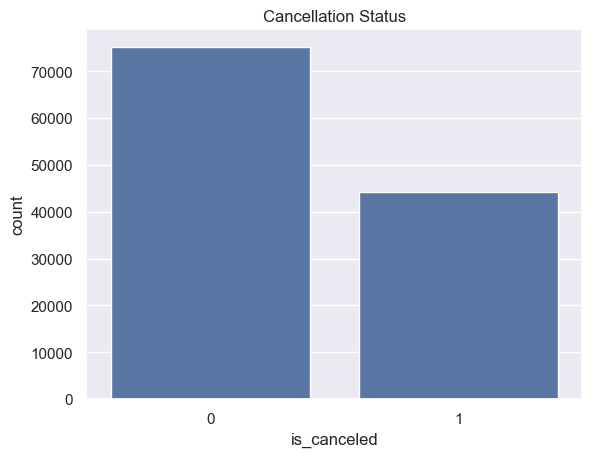

In [50]:
# we can plot these findings onto a bar graph
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancellation Status')


# Question 3
a) For “City Hotel”, what is the percentage of canceled reservations?

b) For “Resort Hotel”, what is the percentage of canceled reservations?

c) What type of hotel that has the bigger percentage of canceled reservations?

In [ ]:
# A 
# filter for "City Hotel" and cancelled=1
# round(100*(len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])),2)

# filter
# df_hotels[(df_hotels.hotel=='City Hotel') &( df_hotels.is_canceled==1)]

# percentage (total canceled / total) * 100. using len() to count the rows 
round(
        len(df_hotels[(df_hotels.hotel=='City Hotel') &( df_hotels.is_canceled==1)]) 
        / len(df_hotels[df_hotels.hotel=='City Hotel']) 
        * 100
    ,2)

# 41.73% of City Hotel bookings are canceled


41.73

In [ ]:
# B
round(
        len(df_hotels[(df_hotels.hotel=='Resort Hotel') &( df_hotels.is_canceled==1)]) 
        / len(df_hotels[df_hotels.hotel=='Resort Hotel']) 
        * 100
    ,2)
# 27.77% of Resort Hotel bookings are canceled


# C
# in our findings, City Hotel has the bugger % of canceled reservations at 41.73%

27.76

# Question 4
Filter data so that it only displays the visitors who don’t cancel the reservation and save the result in df_checkout variable!

In [73]:
df_hotels.dtypes
df_checkout = df_hotels[df_hotels.is_canceled == 0]
df_checkout

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Question 5
a) Show the number of reservations per month of arrival for each type of hotel!

b) Then in which month there are the most reservations in each type of hotel? Make a conclusion whether the trend is the same in both types of hotels?

c) Do as point B but with the name of the month that has been mapped into months in numbers!


In [89]:
# A
# number of reservations per month of arrival and per type of hotel
# use groupby() to group by hotel and arrival_date_month
# people who havent cancelled where is_canceled =0
# count the unique values of reservation id from column 'id' with ['id'].nunique()
q5a = df_hotels[df_hotels.is_canceled == 0]
q5a = q5a.groupby(['hotel','arrival_date_month'])['id'].nunique().reset_index()
# sorting by count
q5a = q5a.sort_values(by='id', ascending=False)
q5a



,hotel,arrival_date_month,id
1,City Hotel,August,5381
5,City Hotel,July,4782
8,City Hotel,May,4579
6,City Hotel,June,4366
10,City Hotel,October,4337
11,City Hotel,September,4290
7,City Hotel,March,4072
0,City Hotel,April,4015
13,Resort Hotel,August,3257
17,Resort Hotel,July,3137


In [107]:
# B
# the most reservation in each type of hotel were occurring in the same month, which is august
# City Hotel	August	5381
# Resort Hotel	August	3257

# C
# to change the name of months into numbers, we can create a dict to map the month num to the name
import calendar
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}


# df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)
# adding the new month number column
# q5a['arrival_date_month_number'] = q5a['arrival_date_month'].map(month_dict)
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)
q5a = q5a.groupby(['hotel','arrival_date_month_number'])['id'].nunique().reset_index()
q5a = q5a.sort_values(by='id', ascending=False)

q5a






C:\Users\monamoe\AppData\Local\Temp\ipykernel_30116\1426105275.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


,hotel,arrival_date_month_number,id
0,City Hotel,1,1
1,City Hotel,2,1
2,City Hotel,3,1
3,City Hotel,4,1
4,City Hotel,5,1
5,City Hotel,6,1
6,City Hotel,7,1
7,City Hotel,8,1
8,City Hotel,9,1
9,City Hotel,10,1


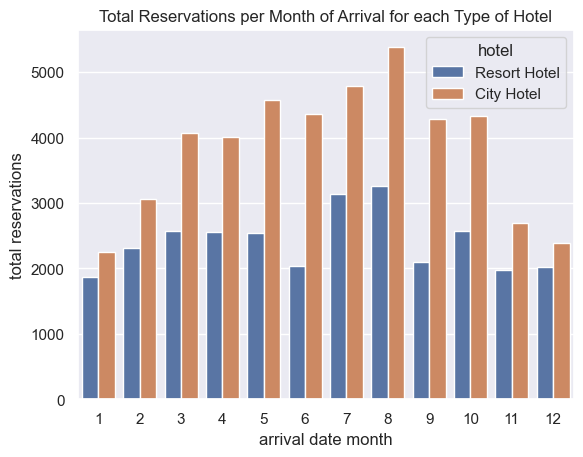

In [106]:
sns.countplot(data=df_checkout, x='arrival_date_month_number',hue='hotel')
plt.xlabel('arrival date month')
plt.ylabel('total reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

# Question 6
a) Create a new column named arrival_date which contains complete information about the year, month, and date of arrival!

b) Change the column to datetime type!

In [123]:
# to combine the value of the year, month and date of arrival into a single column,we must change the 
# column data type from datetime to string. we can use astype() 
# in the month and date of arrival we want to add a 0 if theres only a single difit so it turns
# into a double digit. we can use zfill() to add the 0
df_checkout.dtypes

# df_checkout['arrival_date'] = df_checkout['arrive_date_year'] + '-' + df_checkout['arrival_date_month_number'].astype(str).apply(lambda x: x.zfill(2)) + '-' + df_checkout['arrival_date_day_of_month'].astype(str).apply(lambda x: x.zfill(2)) 
# df_checkout['arrival_date']

df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype('str') +\
        '-' + df_checkout.arrival_date_month_number.astype('str').str.pad(2,fillchar='0') +\
        '-' + df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')
df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])
df_checkout['arrival_date']


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

# Question 7
Create two dataframe containing:

a) Daily reservation (df_daily_reservation)

b) Average of daily reservation per week (df_avg_daily_reservation_per_week)

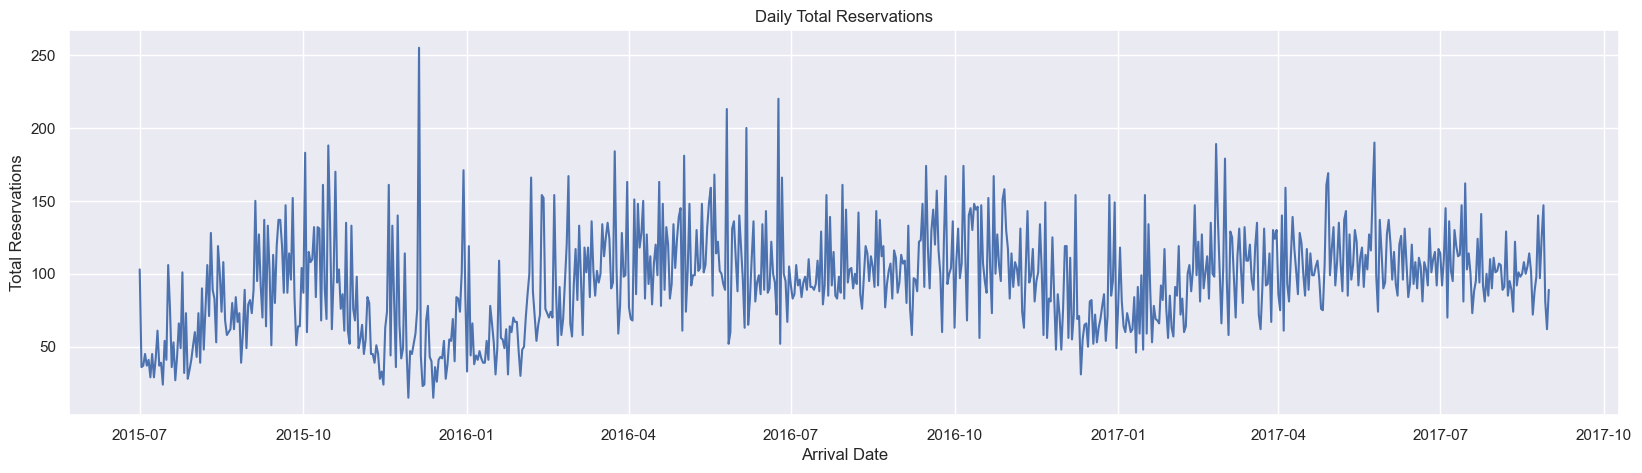

In [ ]:
# A
# define df_daily_reservation 
# count the reservations using size() based on how maby appears in every arrival_date
# rename the column
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index(name='total_reservations')
df_daily_reservation.head(5).sort_values(by='total_reservations', ascending=False)


plt.figure(figsize=(20,5))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='total_reservations')
plt.title('Daily Total Reservations')
plt.ylabel('Total Reservations')
plt.xlabel('Arrival Date')
plt.show()

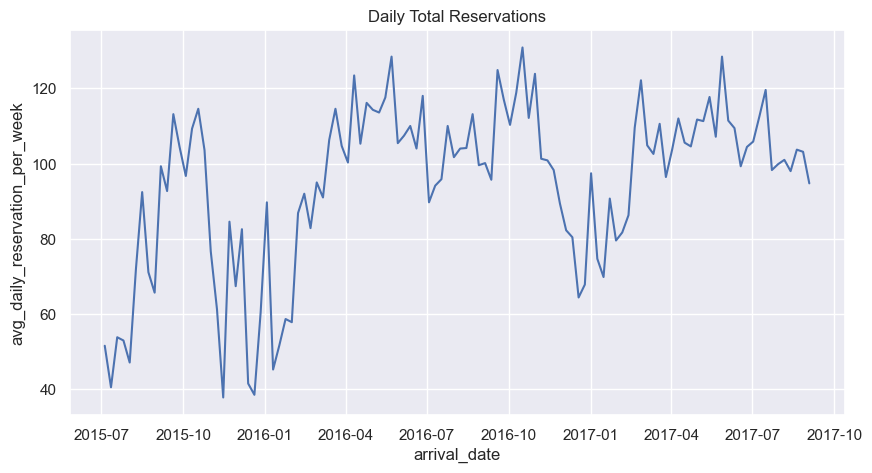

In [152]:
# B
# df_checkout and count the mean() based on average of how many times it appears in every arrival_week


df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(),2)

# df_avg_daily_reservation_per_week.head(40)
plt.figure(figsize=(10,5))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Daily Total Reservations')
plt.show()





# Question 8
a) What is the average ADR (Average Daily Rate) based on hotel type and customer type?

b) Which type of customer has the highest the average of ADR in each type of hotel?

In [ ]:
# use group() to show data based on the hotel and customer type
# groupby() and write the grouping of columns used inside the brackets which are ['hotel'] and ['customer_type']
# mean of ADR we use the mean() of the value 'adr' column written as ['adr'].mean()
round(df_checkout.groupby(['hotel', 'customer_type'])['adr'].mean(),2 )


hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64